In [1]:
# #-----------AGENDA--------------------
# purpose of model evaluation nd usage of classification acc.
# confusionn matrix decribe performance of classifier...............and changing classification threshold ?
# ROC(Receiver operating characteristics) nd difference btw Aera under curve(AUC) & class.accuracy

In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
df = pd.read_csv("C:\\Users\\UMANG PATEL\\Desktop\\Scikit_learn\\Diabetes_Data.csv",header=None,names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
fe_cols = ['pregnant','insulin','bmi','age']
X = df[fe_cols]
y = df['label']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.6770833333333334


In [33]:
# Null Accuracy - achived by always predictinng the most frequent class
print(y_test.value_counts())
print(max(y_test.mean(),1-y_test.mean())) #for binary class null acc.
y_test.value_counts().head(2)/len(y_test) #for multiclass null acc.

0    130
1     62
Name: label, dtype: int64
0.6770833333333333


0    0.677083
1    0.322917
Name: label, dtype: float64

In [36]:
print('TRUE',y_test.values[0:20])
print('PRED',y_pred[0:20])
#notice if true 0 then it predict most time 0 but if 1 then rarely predict 1(underlyinng distribution and "types" of errors)

TRUE [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0]
PRED [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
32


In [37]:
#we can compute F1 score and Matthews coorelation coeffi using this.
#first arg is true_val and sec_arg is pred value ------performance of classifier
print(metrics.confusion_matrix(y_test,y_pred))

[[114  16]
 [ 46  16]]


In [32]:
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

16


In [40]:
print((TP+TN)/float(TP+TN+FP+FN))
print((FP+FN)/float(TP+TN+FP+FN)) #----missclassification rate...

0.6770833333333334
0.3229166666666667


In [46]:
#sensitivity---when actual val is + then prediction  corret.......
#True postive rate  or Recall
print(TP/float(TP+FN))
# print(metrics.recall_score(y_test,y_pred))

0.25806451612903225


In [43]:
#specificity-------reverse of above
#how selective is classifier for predicting + instances
print(TN/float(FP+TN))
#high means model correctly predict - val

0.8769230769230769


In [44]:
#False + Rate : when actual val - how often is the pred incorrect ? 
print(FP/float(FP+TN))
#minmize FP & optimize model for specificity - spam filter
#minmize FN & optimize model for sensitivty - fraud transaction.....


0.12307692307692308


In [48]:
# Precision : when + val is pred,how often the prediction is correct?.......how precise
print(TP/float(TP+FP))
# print(metrics.precision_score(y_test,y_pred))

0.5


In [58]:
#Adjusting the classification th:
print(logreg.predict(X_test)[0:10])
logreg.predict_proba(X_test)[0:10,:] #row represnt prob(chances) and col represnt class.

[0 0 0 0 0 0 0 1 0 1]


array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [68]:
#for class 1
y_pred_prob = logreg.predict_proba(X_test)[:,1]
# len(y_pred_prob)

192

Text(0, 0.5, 'Frequency')

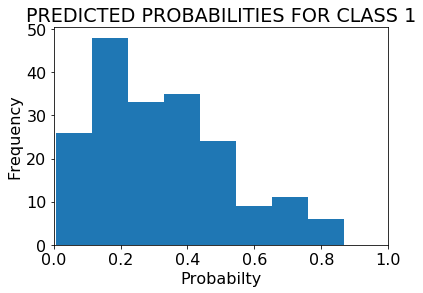

In [63]:
%matplotlib inline
plt.rcParams['font.size'] = 16
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)#left write 0 and 1 
plt.title('PREDICTED PROBABILITIES FOR CLASS 1')
plt.xlabel("Probabilty")
plt.ylabel('Frequency')

In [86]:
#now we decrease threshold to increase the sensitivity
from sklearn.preprocessing import binarize
y_pred = binarize([y_pred_prob],0.3)[0] #we only want 0.3 above

In [84]:
print(y_pred_prob[0:10])
print(y_pred[0:10])

[0.38594133 0.2494602  0.25832352 0.39708673 0.11573389 0.12304105
 0.49180008 0.55417711 0.22049231 0.74146697]
[1. 0. 0. 1. 0. 0. 1. 1. 0. 1.]


In [88]:
print(confusion) #default th = 0.5

[[114  16]
 [ 46  16]]


In [90]:
print(metrics.confusion_matrix(y_test,y_pred))#th = 0.3

[[82 48]
 [17 45]]


In [93]:
print(45/float(17+45)) #sensitivity +++++++++ this two have inverse relationship
print(82/float(82+48)) #specificity ---------

0.7258064516129032
0.6307692307692307


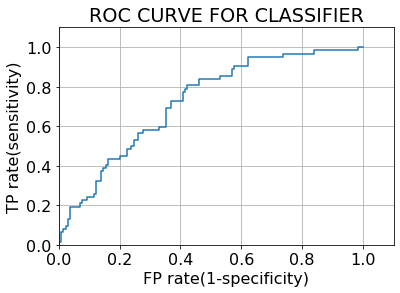

In [96]:
#ROC curve - we see sen & spec are affected by various th
#AUC is the percentage of the ROC plot that is underneath the curve(single num summary)
#useful when highclass imbalance
fpr,tpr,thresolds = metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.title("ROC CURVE FOR CLASSIFIER")
plt.xlabel("FP rate(1-specificity)")
plt.ylabel("TP rate(sensitivity)")
plt.grid(True)

In [100]:
#we cant see th used to generate curve on the Roc curve itself.
#send value of th and return sen & spec..
def eva_th(th):
    print('Sensitivity',tpr[thresolds > th][-1])
    print('Specificity',1-fpr[thresolds > th][-1])
eva_th(0.3)    

Sensitivity 0.7258064516129032
Specificity 0.6307692307692307


In [101]:
print(metrics.roc_auc_score(y_test,y_pred_prob)) #best auc for any classifier is 1

0.7227047146401985
